In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [10]:
file_path = 'Largest-Companies.csv'
df = pd.read_csv(file_path, encoding = 'ISO-8859-1')

In [11]:
def fillWithIndustryMedian(df,column,group_by='Industry'):

    industry_median = df.groupby(group_by)[column].median()

    #Filling missing values using the calculated median

    df[column] = df.apply(
        lambda row: industry_median[row[group_by]] if pd.isna(row[column]) else row[column],
        axis = 1
    )
    return df

In [12]:
df.describe()

,Rank,Sales,Profit,Assets,Market Value,Founded,Employees
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,1999.000000,1.943000e+03
mean,1001.000000,25.838675,2.248652,119.091304,44.204768,1966.408204,4.858326e+04
std,577.783264,46.583439,6.181587,388.317154,149.325120,407.847622,8.975563e+04
min,1.000000,0.123000,-17.900000,1.300000,0.007000,1472.000000,1.100000e+01
25%,501.000000,6.000000,0.486800,15.500000,8.000000,1926.000000,8.412000e+03
50%,1001.000000,12.700000,0.931000,33.600000,17.400000,1973.000000,2.160000e+04
75%,1501.000000,25.400000,2.100000,78.000000,37.800000,1997.000000,5.222600e+04
max,2001.000000,657.300000,116.900000,6586.000000,3123.100000,20047.000000,1.600000e+06


In [13]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Industry         2
Founded          2
Headquarters    10
CEO             31
Employees       58
dtype: int64


In [14]:
# Percentage of Missing Data
missing_percentage = (df.isna().sum()/len(df)) * 100
print(missing_percentage)

Rank            0.000000
Name            0.000000
Sales           0.000000
Profit          0.000000
Assets          0.000000
Market Value    0.000000
Industry        0.099950
Founded         0.099950
Headquarters    0.499750
Country         0.000000
CEO             1.549225
Employees       2.898551
dtype: float64


In [15]:
print(df['Employees'][118])

nan


In [16]:
# Filling missing Employee values by Industry Median

df = fillWithIndustryMedian(df,'Employees')

# Deleting the rows that has missing value of Industry as it is critical

df = df.dropna(subset=['Founded','Industry'])

# Deleting CEO, column

df = df.drop(columns=['CEO'])
df = df.drop(columns=['Headquarters'])

In [17]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [18]:
print(df['Employees'][1383])

26909.0


In [19]:
print(df.isna().sum())

Rank            0
Name            0
Sales           0
Profit          0
Assets          0
Market Value    0
Industry        0
Founded         0
Country         0
Employees       0
dtype: int64


In [20]:
df.describe()

,Rank,Sales,Profit,Assets,Market Value,Founded,Employees
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1.999000e+03
mean,1000.678339,25.857923,2.249852,119.200250,44.231436,1966.408204,4.777044e+04
std,577.980991,46.602742,6.184559,388.496142,149.397303,407.847622,8.869167e+04
min,1.000000,0.123000,-17.900000,1.300000,0.007000,1472.000000,1.100000e+01
25%,500.500000,6.000000,0.486300,15.500000,7.950000,1926.000000,8.180000e+03
50%,1000.000000,12.700000,0.931000,33.700000,17.400000,1973.000000,2.100000e+04
75%,1501.500000,25.400000,2.100000,78.100000,37.800000,1997.000000,5.179100e+04
max,2001.000000,657.300000,116.900000,6586.000000,3123.100000,20047.000000,1.600000e+06


In [21]:
country_counts = df['Country'].value_counts()
top_country = country_counts.head(10)
print(top_country)

Country
United States     619
China             282
Japan             181
India              70
United Kingdom     65
South Korea        61
Canada             59
France             50
Germany            50
Switzerland        46
Name: count, dtype: int64


In [22]:
numeric_df = df.select_dtypes(include=['float64'])

correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                 Sales    Profit    Assets  Market Value   Founded  Employees
Sales         1.000000  0.661853  0.381042      0.517919 -0.017720   0.648749
Profit        0.661853  1.000000  0.461348      0.808200 -0.009862   0.327267
Assets        0.381042  0.461348  1.000000      0.140605 -0.014950   0.238756
Market Value  0.517919  0.808200  0.140605      1.000000 -0.005238   0.280181
Founded      -0.017720 -0.009862 -0.014950     -0.005238  1.000000  -0.016209
Employees     0.648749  0.327267  0.238756      0.280181 -0.016209   1.000000


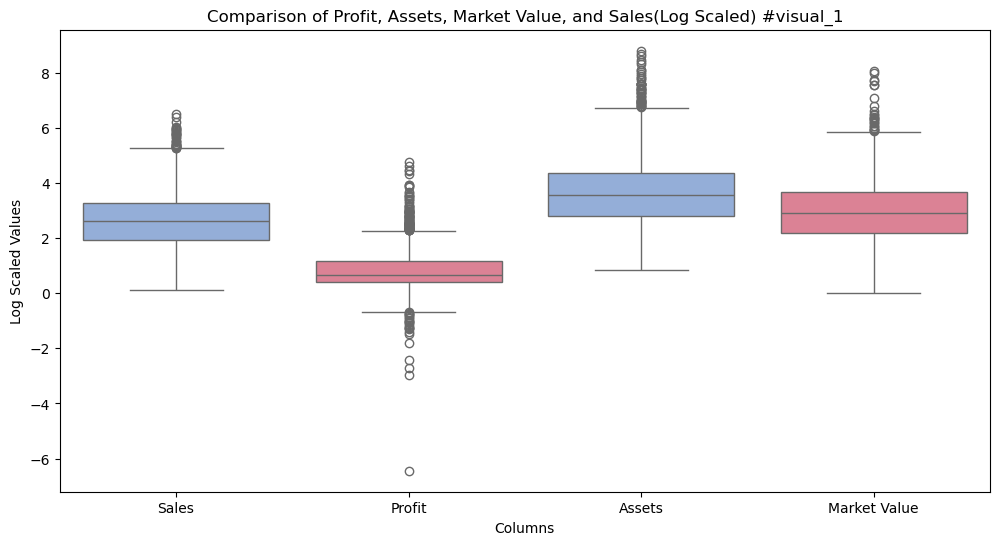

In [23]:
# DATA VISUALISATION #task_1
import seaborn as sns

colors = ['#89ABE3', '#EA738D']
df_scaled = df[['Sales','Profit','Assets','Market Value']].apply(lambda x: np.log1p(x))

plt.figure(figsize = (12,6))
sns.boxplot(data = df_scaled, palette=colors)

plt.title('Comparison of Profit, Assets, Market Value, and Sales(Log Scaled) #visual_1')
plt.ylabel('Log Scaled Values')
plt.xlabel('Columns')
plt.show()

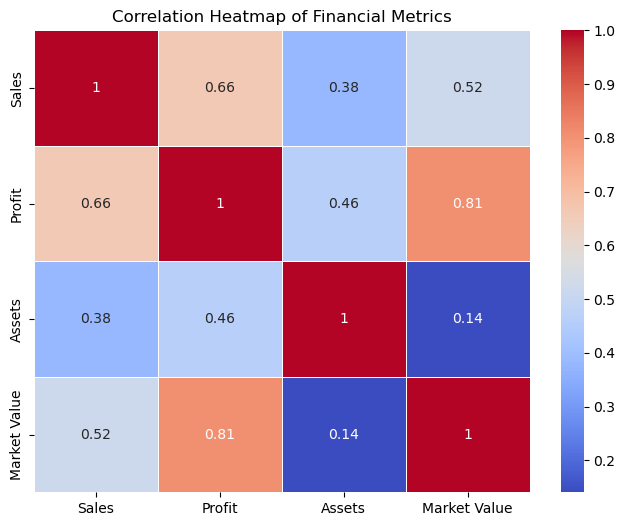

In [24]:
# Correlation Heatmap of Financial Metric
colors = ['#89ABE3', '#EA738D']
plt.figure(figsize=(8,6))
correlation_matrix = df[['Sales','Profit','Assets','Market Value']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()

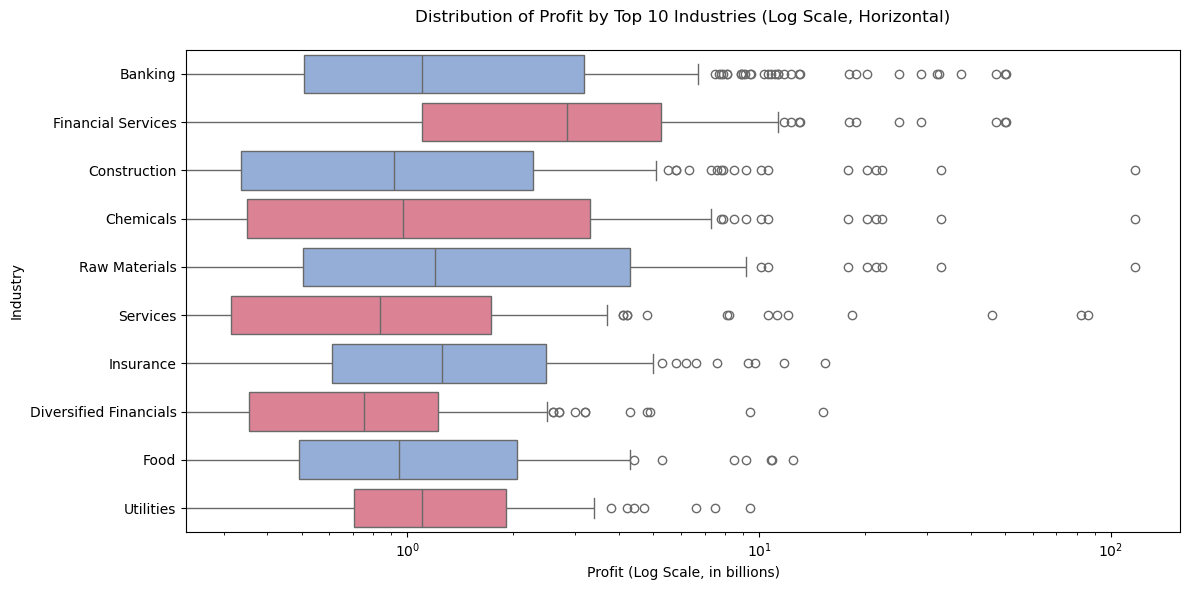

In [25]:
from collections import Counter
import re

# Redefining the code to create the industry dictionary by separating the 'Industry' column values
industry_dict = {}

# Separating industries for each company
for idx, row in df.iterrows():
    company_name = row['Name']
    industries = row['Industry']
    if pd.notna(industries):  
        industries_list = re.split(r"- | & | and | And ", industries)  
        industries_list = [industry.strip() for industry in industries_list]  
    else:
        industries_list = [] 
    industry_dict[company_name] = industries_list

all_industries = []
for industries in industry_dict.values():
    all_industries.extend(industries)

top_10_industries = [industry for industry, count in Counter(all_industries).most_common(10)]


expanded_df = df[['Name', 'Profit']].copy()
expanded_df['Industry'] = expanded_df['Name'].map(industry_dict)
expanded_df = expanded_df.explode('Industry')  

expanded_df_top_10 = expanded_df[expanded_df['Industry'].isin(top_10_industries)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=expanded_df_top_10, y='Industry', x='Profit', orient='h', palette=colors)
plt.xscale('log')  
plt.yticks(rotation=0)

plt.title("Distribution of Profit by Top 10 Industries (Log Scale, Horizontal)", pad=20)

plt.xlabel("Profit (Log Scale, in billions)")
plt.ylabel("Industry")

plt.tight_layout()
plt.show()

In [26]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
scipy: 1.13.1
numpy: 1.26.4
matplotlib: 3.9.2
pandas: 2.2.2
sklearn: 1.5.1


In [27]:
# Load libraries
from pandas import read_csv 
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
# shape
print(df.shape)

(1999, 10)


In [29]:
# class distribution
print(df.groupby('Country').size())

Country
Argentina                 3
Australia                32
Austria                   9
Belgium                   9
Bermuda                   8
Brazil                   26
Canada                   59
Cayman Islands            1
Chile                     7
China                   282
Colombia                  7
Croatia                   2
Cyprus                    1
Czech Republic            1
Denmark                  13
Egypt                     1
Finland                   9
France                   50
Germany                  50
Greece                    8
Hong Kong                42
Hungary                   3
India                    70
Indonesia                 9
Ireland                  21
Israel                   12
Italy                    28
Japan                   181
Jordan                    1
Kazakhstan                2
Kuwait                    2
Luxembourg                3
Malaysia                  9
Mexico                   14
Morocco                   2
Netherlands 

In [30]:
    country_counts = df['Country'].value_counts()
    top_country = country_counts.head(10)
    print(top_country)

Country
United States     619
China             282
Japan             181
India              70
United Kingdom     65
South Korea        61
Canada             59
France             50
Germany            50
Switzerland        46
Name: count, dtype: int64


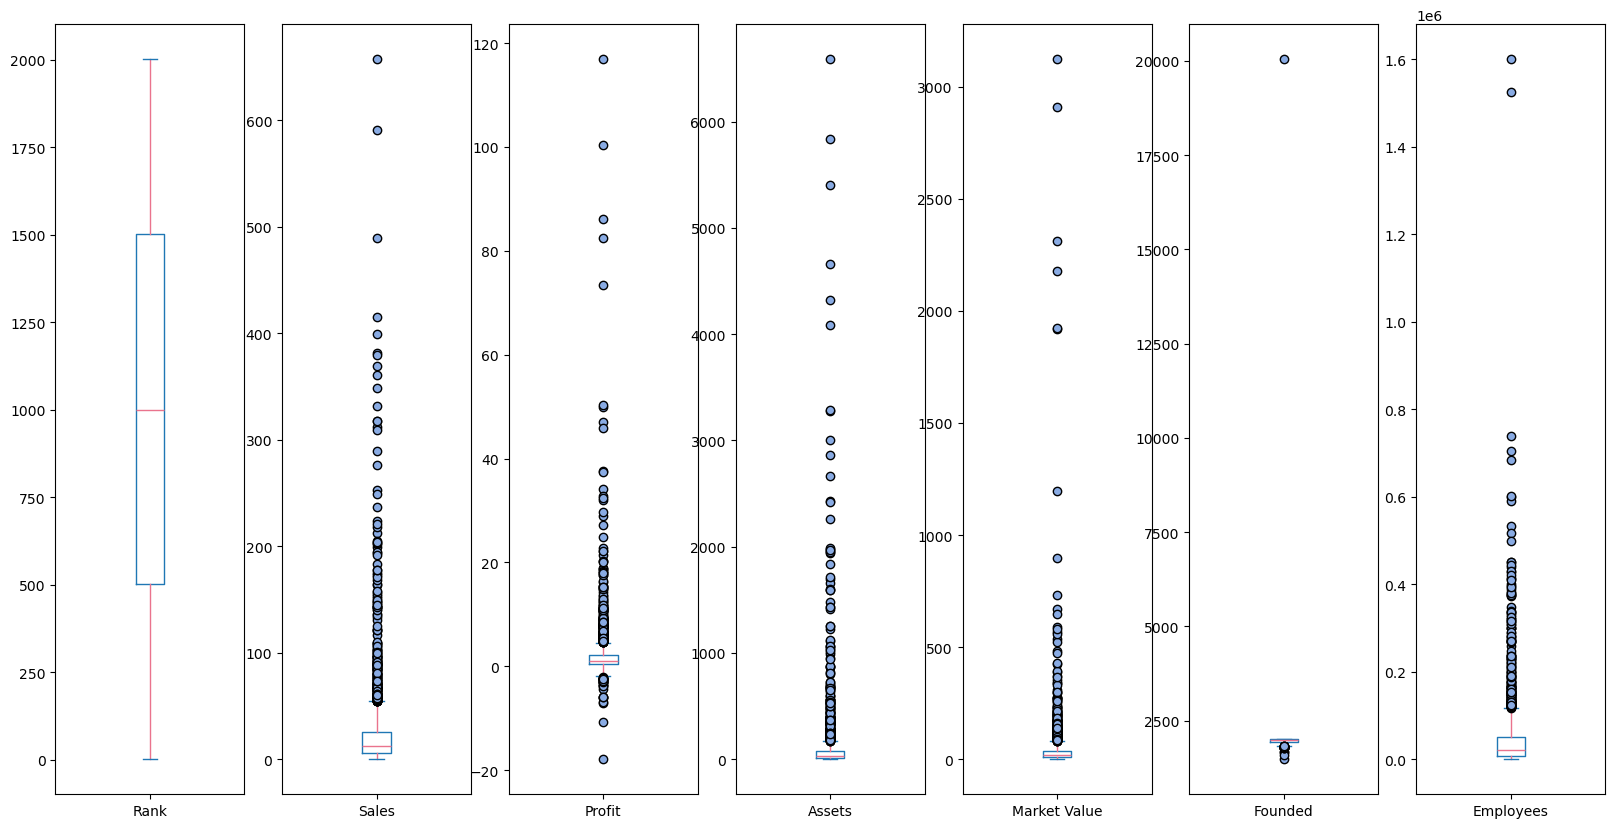

In [31]:
def get_gradient_colors(n_colors, color_map='purple'):
    if color_map == 'purple':
        colors = [
            '#89ABE3', '#EA738D'
        ]
    return colors[:n_colors]
# box and whisker plots
df.plot(kind='box', subplots=True,figsize=(20,10),  sharex=False, sharey=False, whiskerprops=dict(color='#EA738D'), medianprops=dict(color='#EA738D'), flierprops=dict(markerfacecolor='#89ABE3', marker='o'))
plt.show() 

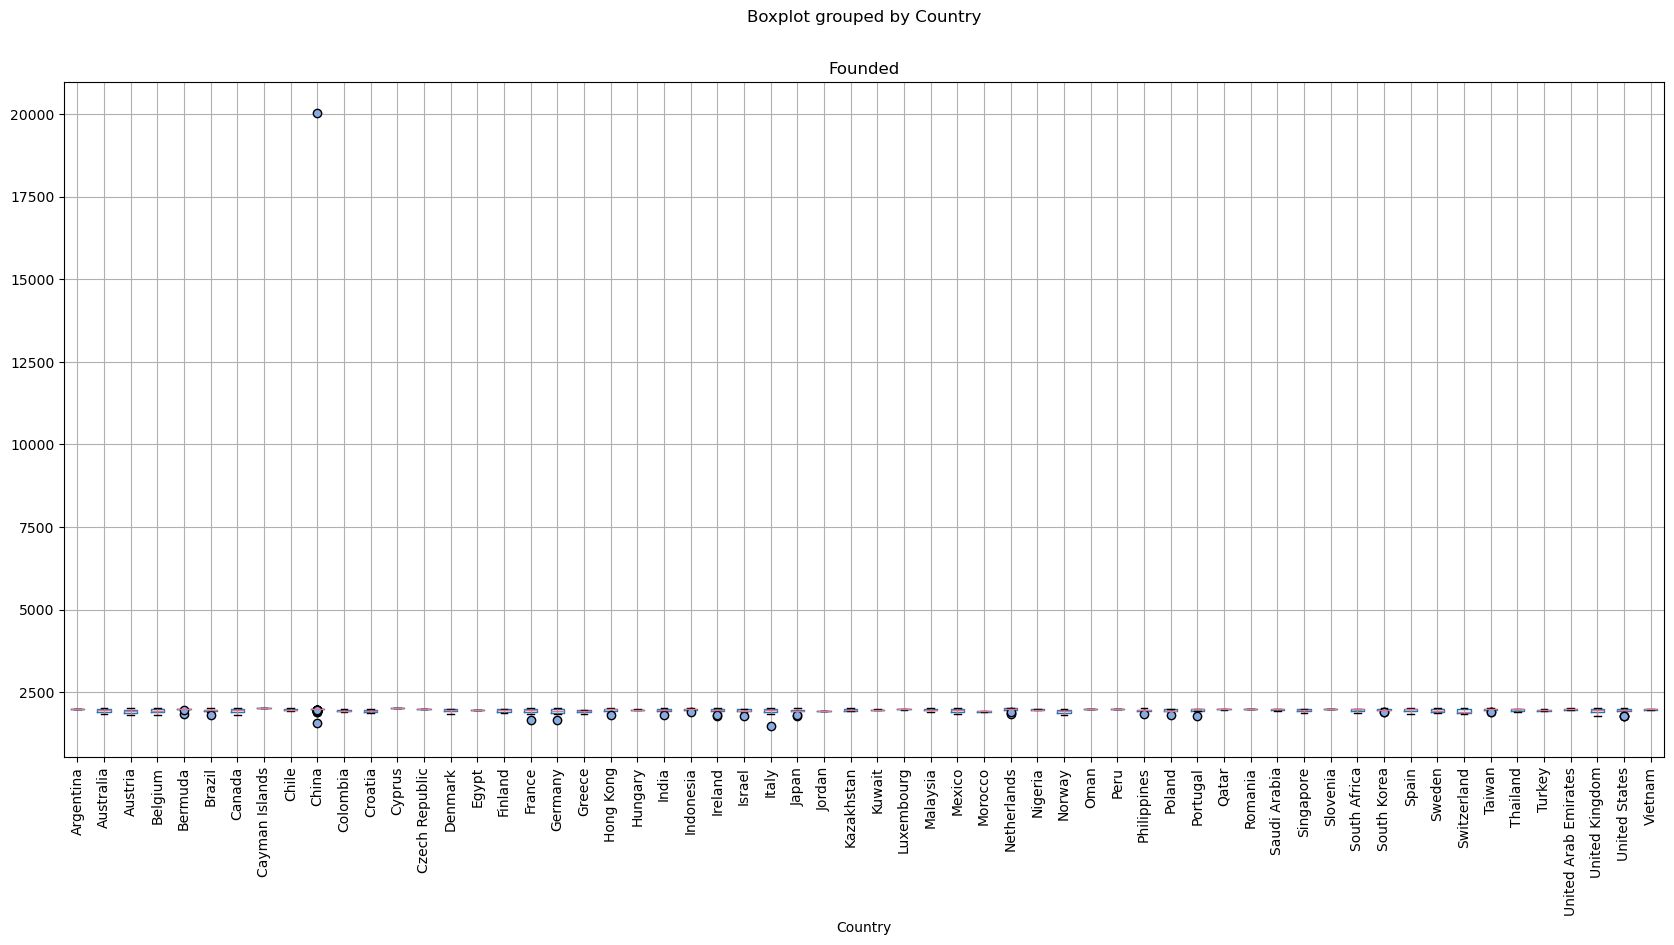

In [32]:
# box and whisker plots
df.boxplot(column='Founded', by='Country',rot=90, figsize=(20,9),whiskerprops=dict(color='#EA738D'), medianprops=dict(color='#EA738D'), flierprops=dict(markerfacecolor='#89ABE3', marker='o'))
plt.show() 

In [33]:
max_value = df['Founded'].max()
print(max_value)

20047.0


In [34]:
threshold = 2025
# Find the row with the outlier
outlier_row = df[df['Founded'] > threshold]
print(outlier_row)
df = df[df['Founded'] <= threshold]

      Rank                             Name  Sales  Profit  Assets  \
1980  1981  China Merchants Energy Shipping    3.7  0.7099     8.8   

      Market Value        Industry  Founded Country  Employees  
1980          10.3  Transportation  20047.0   China     4755.0  


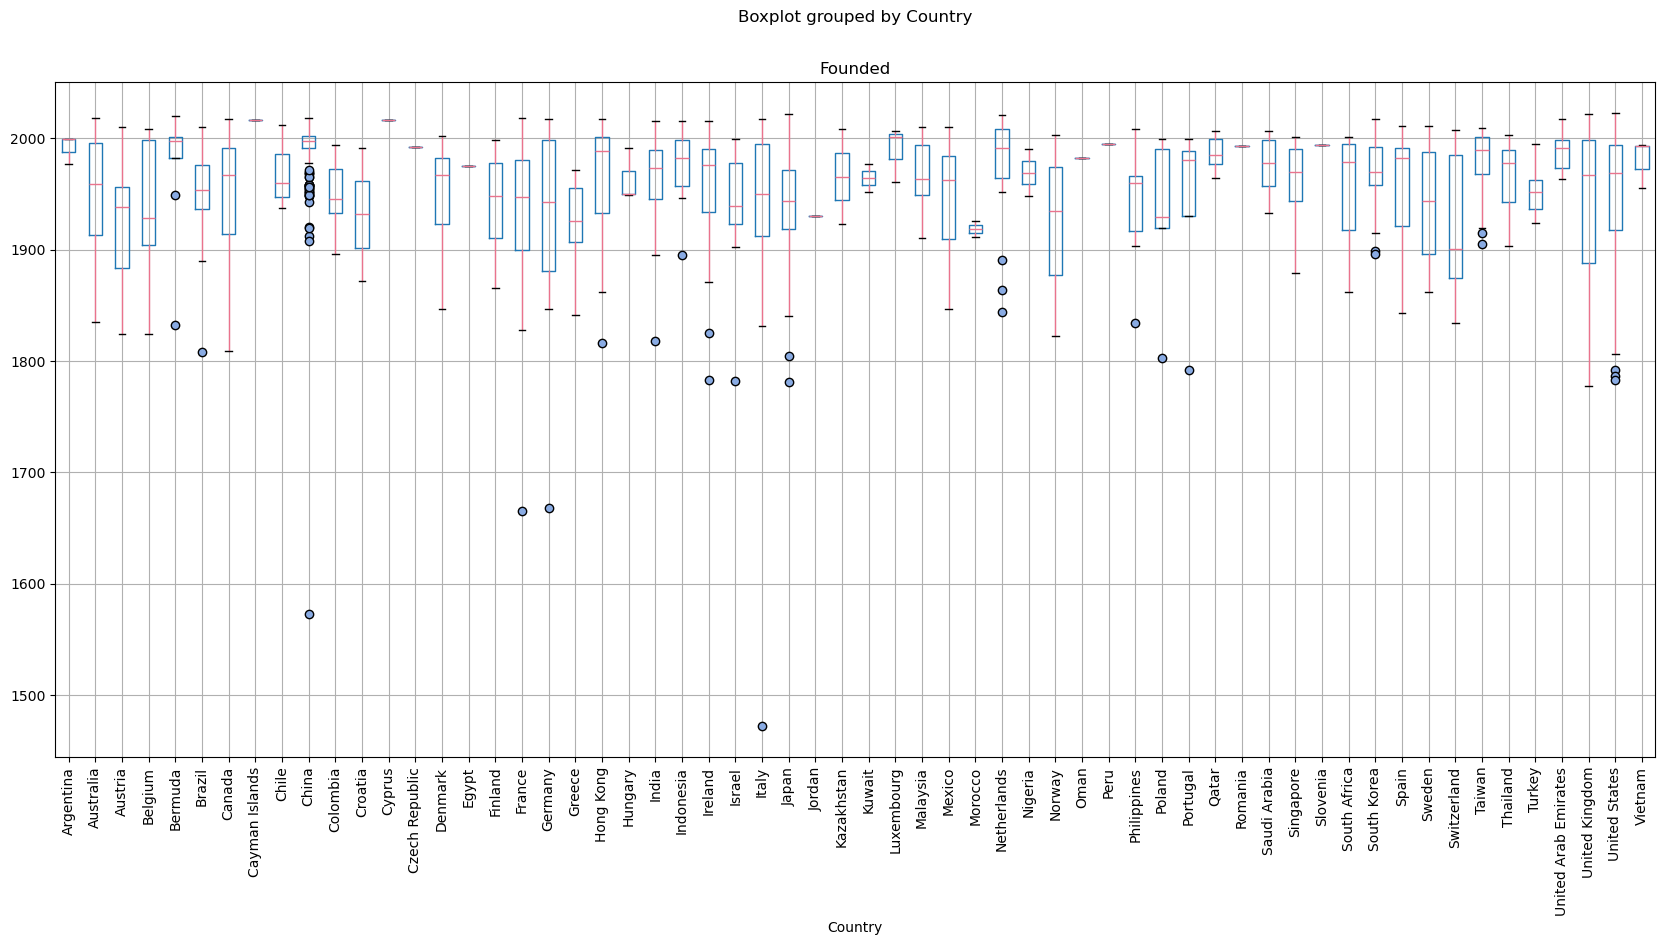

In [35]:
# box and whisker plots
df.boxplot(column='Founded', by='Country',rot=90, figsize=(20,9),whiskerprops=dict(color='#EA738D'), medianprops=dict(color='#EA738D'), flierprops=dict(markerfacecolor='#89ABE3', marker='o'))
plt.show()  

<Axes: ylabel='Country'>

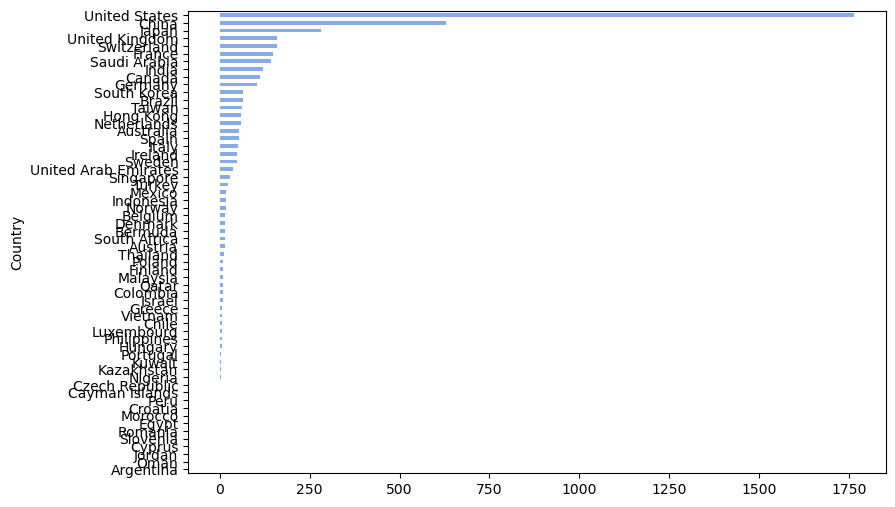

In [36]:
profit_totals = df.groupby("Country")["Profit"].sum().sort_values()
profit_totals.plot(kind="barh", fontsize=10 , color = '#89ABE3', figsize=(9,6))

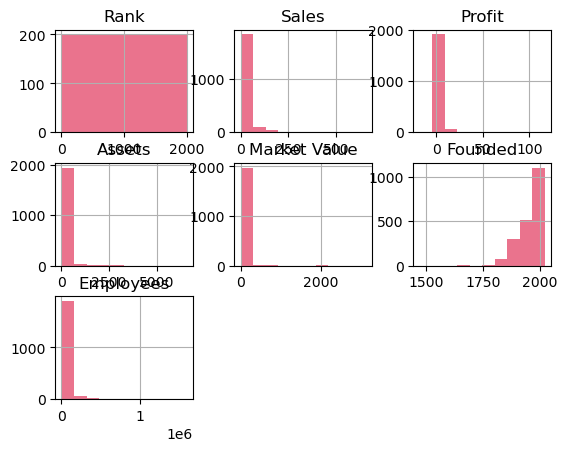

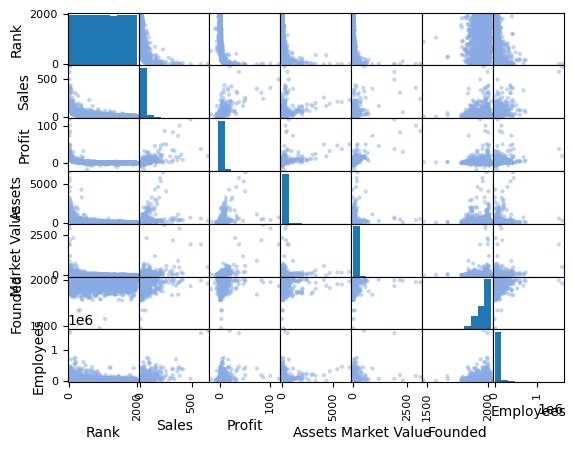

In [37]:
# histograms
df.hist( color = '#EA738D')
# scatter plot matrix
scatter_matrix(df, color = '#89ABE3')
plt.show()

In [38]:
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("rocket")
colors1= ['#89ABE3', '#EA738D']

df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100
df['ROA'] = (df['Profit'] / df['Assets']) * 100
df['Market_to_Assets'] = df['Market Value'] / df['Assets']
df['Sales_per_Employee'] = df['Sales'] / df['Employees']
df['Profit_per_Employee'] = df['Profit'] / df['Employees']

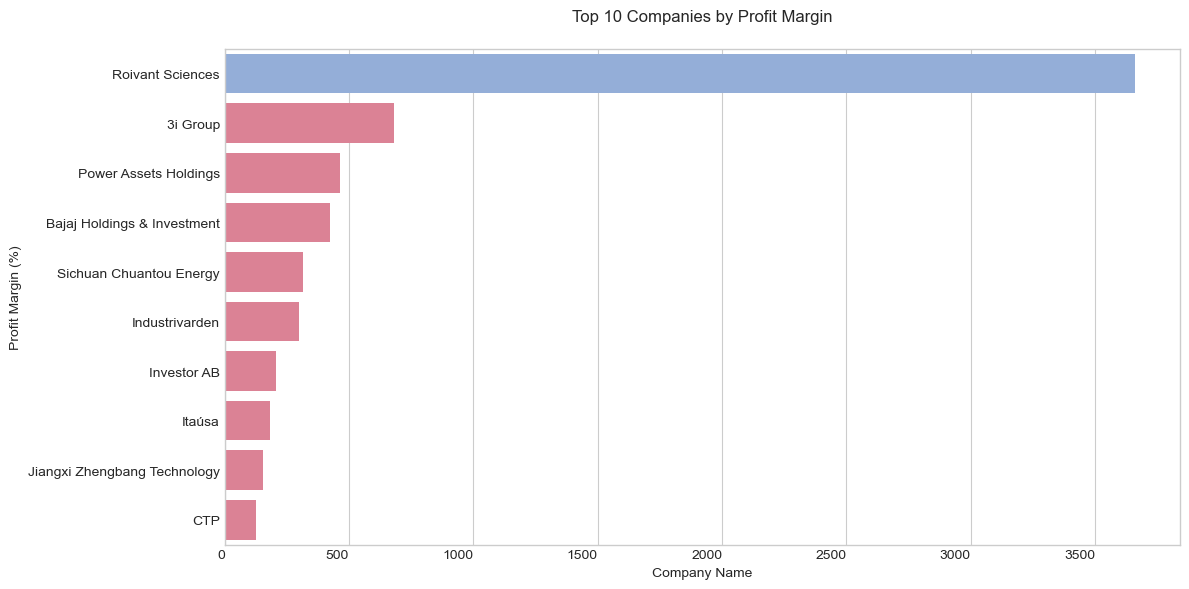

In [39]:
def plot_top_profit_margins():
    plt.figure(figsize=(12, 6))
    top_margins = df.nlargest(10, 'Profit_Margin')
    
    colors3 = [colors1[0] if x == top_margins['Profit_Margin'].max() 
             else colors1[1] for x in top_margins['Profit_Margin']]
    
    sns.barplot(data=top_margins, 
                y='Name', 
                x='Profit_Margin',
                palette=colors3)
    
    plt.title('Top 10 Companies by Profit Margin', pad=20)
    plt.xlabel('Company Name')
    plt.ylabel('Profit Margin (%)')
    
    plt.xticks(ha='right')
    plt.tight_layout()
    plt.show()
plot_top_profit_margins()

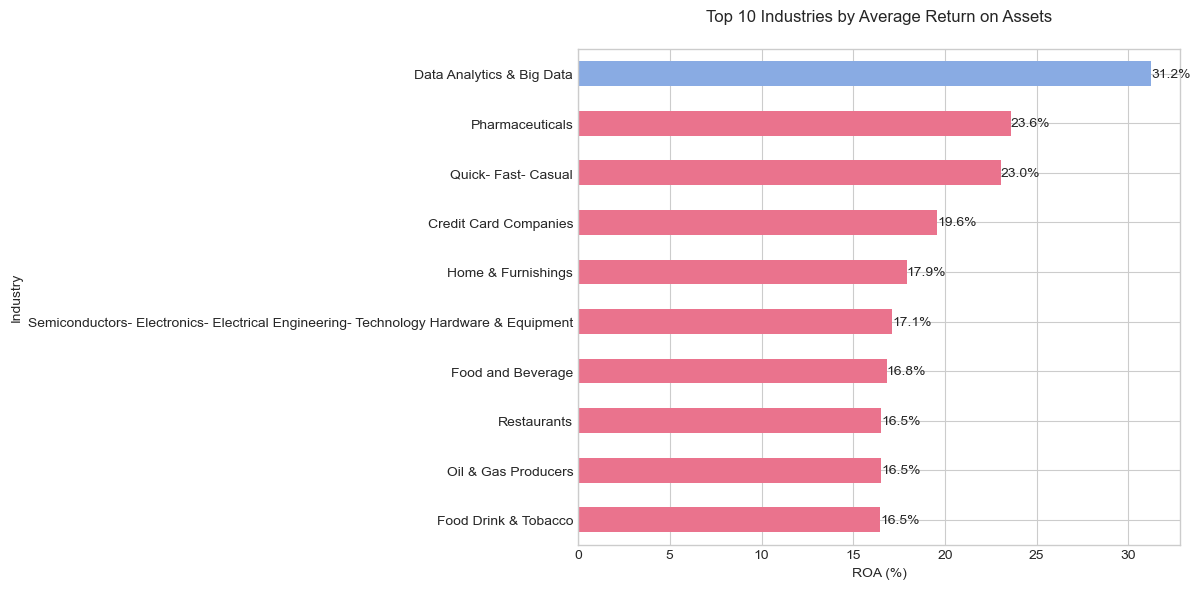

In [40]:
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-v0_8-whitegrid')


def billions_formatter(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x:.1f}'
def plot_top_industry_roa():
    plt.figure(figsize=(12, 6))
    industry_roa = df.groupby('Industry')['ROA'].mean().nlargest(10).sort_values(ascending=True)
    
    colors = [colors1[0] if x == industry_roa.max() 
             else colors1[1] for x in industry_roa]
    
    bars = industry_roa.plot(kind='barh', color=colors)
    
    for i, v in enumerate(industry_roa):
        bars.text(v, i, f'{v:.1f}%', va='center')
    
    plt.title('Top 10 Industries by Average Return on Assets', pad=20)
    plt.xlabel('ROA (%)')
    plt.ylabel('Industry')
    
    plt.tight_layout()
    plt.show()
plot_top_industry_roa()

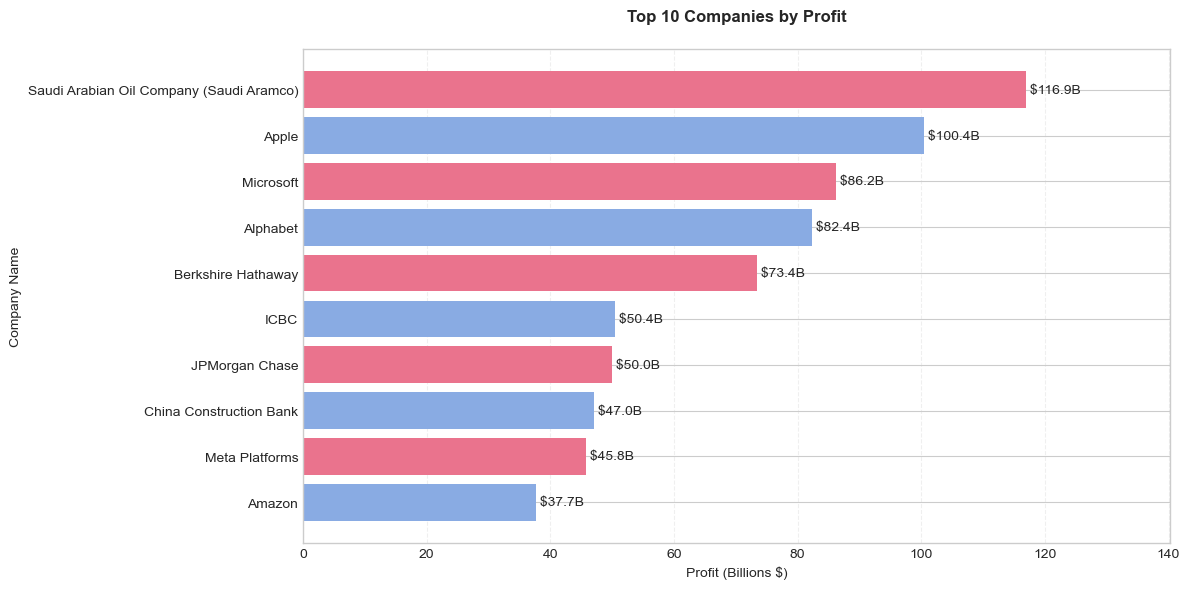

In [41]:
def plot_top_companies_profit():
    plt.figure(figsize=(12, 6))
    
    top_profit = df.nlargest(10, 'Profit').sort_values('Profit')
    
    colors = get_gradient_colors(len(top_profit))
    
    bars = plt.barh(y=range(len(top_profit)), 
                   width=top_profit['Profit'],
                   color=colors)
    
    plt.yticks(range(len(top_profit)), top_profit['Name'])
    
    for i, v in enumerate(top_profit['Profit']):
        plt.text(v, i, f' ${v:.1f}B', va='center')
    
    plt.title('Top 10 Companies by Profit', pad=20, fontsize=12, fontweight='bold')
    plt.xlabel('Profit (Billions $)', fontsize=10)
    plt.ylabel('Company Name', fontsize=10)
    
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    
    plt.margins(x=0.2)
    
    plt.tight_layout()
    plt.show()

plot_top_companies_profit()
    

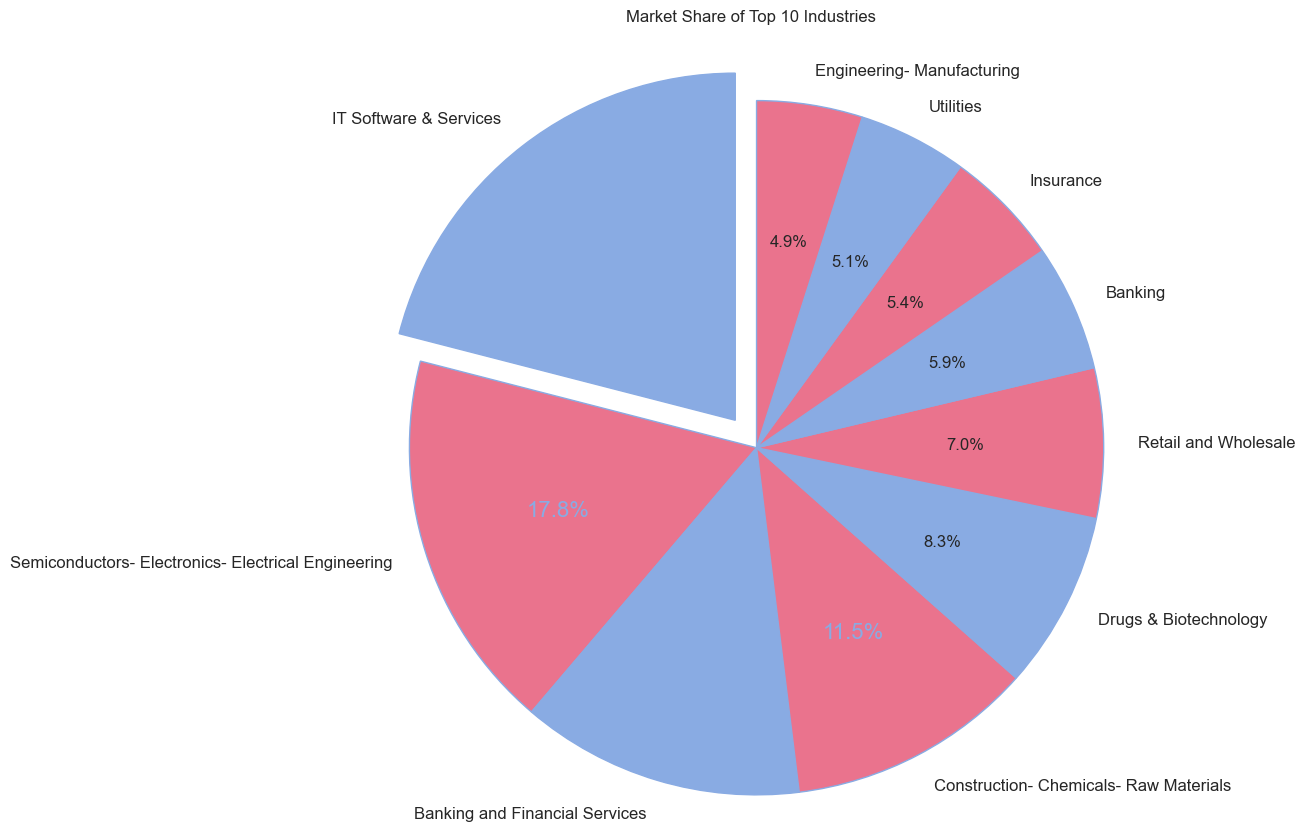

In [42]:
def plot_top_industry_market_share():
    plt.figure(figsize=(10, 10))
    
    industry_market = df.groupby('Industry')['Market Value'].sum().nlargest(10)
    total_market = industry_market.sum()
    market_share = (industry_market / total_market * 100)
    
    textprops = {'fontsize': 12}
    wedgeprops = {'linewidth': 1, 'edgecolor': '#89ABE3'}
    
    wedges, texts, autotexts = plt.pie(market_share,
                                       labels=market_share.index,
                                       colors=colors,
                                       autopct='%1.1f%%',
                                       startangle=90,
                                       explode=[0.1 if i == market_share.argmax() else 0 for i in range(len(market_share))],
                                       textprops=textprops,
                                       wedgeprops=wedgeprops)
    
    for i, autotext in enumerate(autotexts):
        if i < 4: 
            autotext.set_color('#89ABE3')
            autotext.set_fontsize(16)  
        else:
            autotext.set_fontsize(12)  

    plt.title('Market Share of Top 10 Industries', pad=20)
    plt.axis('equal')
    plt.show()

plot_top_industry_market_share()

In [43]:
import re
import pandas as pd
industry_dict = {}
for idx, row in df.iterrows():
    company_name = row['Name']
    industries = row['Industry']
    if pd.notna(industries):  
        industries_list = re.split(r"- | & | and | And ", industries)  
        industries_list = [industry.strip() for industry in industries_list]  
    else:
        industries_list = [] 
    
    industry_dict[company_name] = industries_list

for company, industries in list(industry_dict.items())[:20]:
    print(f"{company}: {industries}")
# top_profit_ceos = df.sort_values(by='Profit', ascending=False)[['CEO', 'Name', 'Profit']]

# top_profit_ceos = top_profit_ceos.head(10)
# print(top_profit_ceos)

JPMorgan Chase: ['Banking', 'Financial Services']
Berkshire Hathaway: ['Conglomerate']
Saudi Arabian Oil Company (Saudi Aramco): ['Construction', 'Chemicals', 'Raw Materials']
ICBC: ['Banking', 'Financial Services']
Bank of America: ['Banking', 'Financial Services']
Amazon: ['Retail', 'Wholesale']
China Construction Bank: ['Banking', 'Financial Services']
Microsoft: ['IT Software', 'Services']
Agricultural Bank of China: ['Banking']
Alphabet: ['IT Software', 'Services']
Toyota Motor: ['Consumer Durables']
Apple: ['Semiconductors', 'Electronics', 'Electrical Engineering']
Bank of China: ['Banking']
ExxonMobil: ['Construction', 'Chemicals', 'Raw Materials']
HSBC Holdings: ['Business Services', 'Supplies']
Wells Fargo: ['Banking', 'Financial Services']
Shell Plc: ['Construction', 'Chemicals', 'Raw Materials']
PetroChina: ['Oil', 'Gas Operations']
UnitedHealth Group: ['Insurance']
Walmart: ['Pharmacies']


In [44]:
numeric_df = df.select_dtypes(include=['float64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                        Sales    Profit    Assets  Market Value   Founded  \
Sales                1.000000  0.661841  0.381003      0.517900 -0.056872   
Profit               0.661841  1.000000  0.461329      0.808195 -0.034406   
Assets               0.381003  0.461329  1.000000      0.140578 -0.068590   
Market Value         0.517900  0.808195  0.140578      1.000000 -0.001559   
Founded             -0.056872 -0.034406 -0.068590     -0.001559  1.000000   
Employees            0.648708  0.327231  0.238706      0.280146 -0.043197   
Profit_Margin       -0.037327  0.046256 -0.002883      0.013392  0.019664   
ROA                  0.010915  0.227976 -0.130773      0.238476  0.005976   
Market_to_Assets    -0.049704  0.109027 -0.128646      0.327652  0.084157   
Sales_per_Employee   0.000781 -0.001230 -0.003570     -0.015263  0.034898   
Profit_per_Employee -0.028842  0.020029 -0.006929     -0.006400  0.017236   

                     Employees  Profit_Margin       ROA  Market_to_Assets  

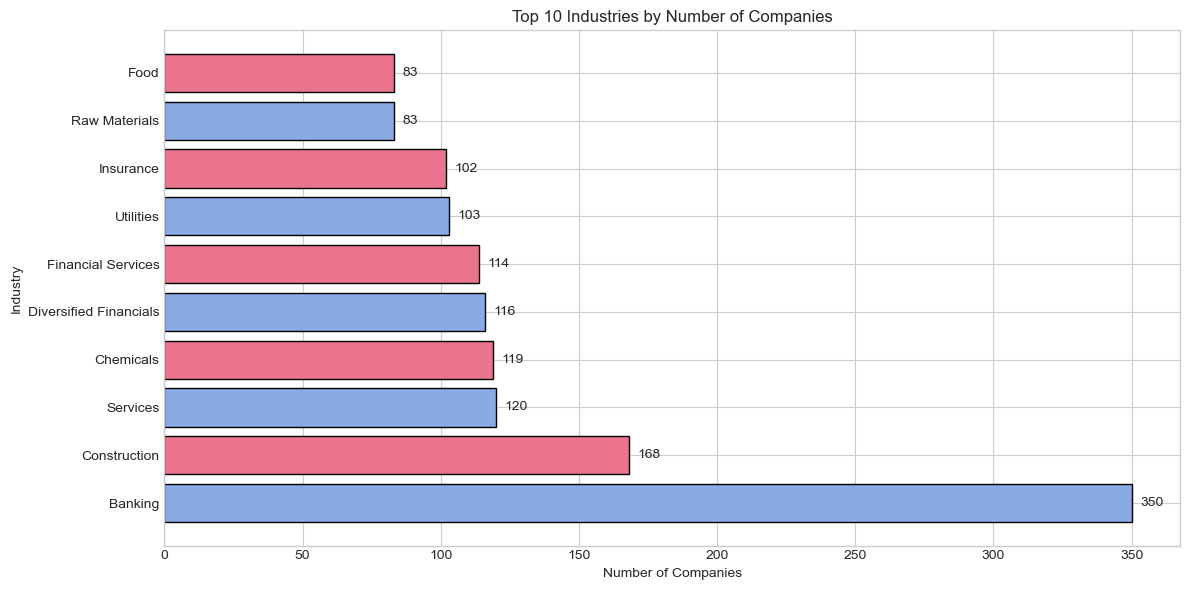

In [45]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

industry_counter = Counter()
for industries in industry_dict.values():
    industry_counter.update(industries)

top_industries = industry_counter.most_common(10)
industries, counts = zip(*top_industries)

plt.figure(figsize=(12, 6))
bars = plt.barh(industries, counts, color=colors, edgecolor='black')
plt.ylabel("Industry")
plt.xlabel("Number of Companies")
plt.title("Top 10 Industries by Number of Companies")

for bar, count in zip(bars, counts):
    xval = bar.get_width()
    plt.text(xval + 3, bar.get_y() + bar.get_height() / 2, f'{count}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

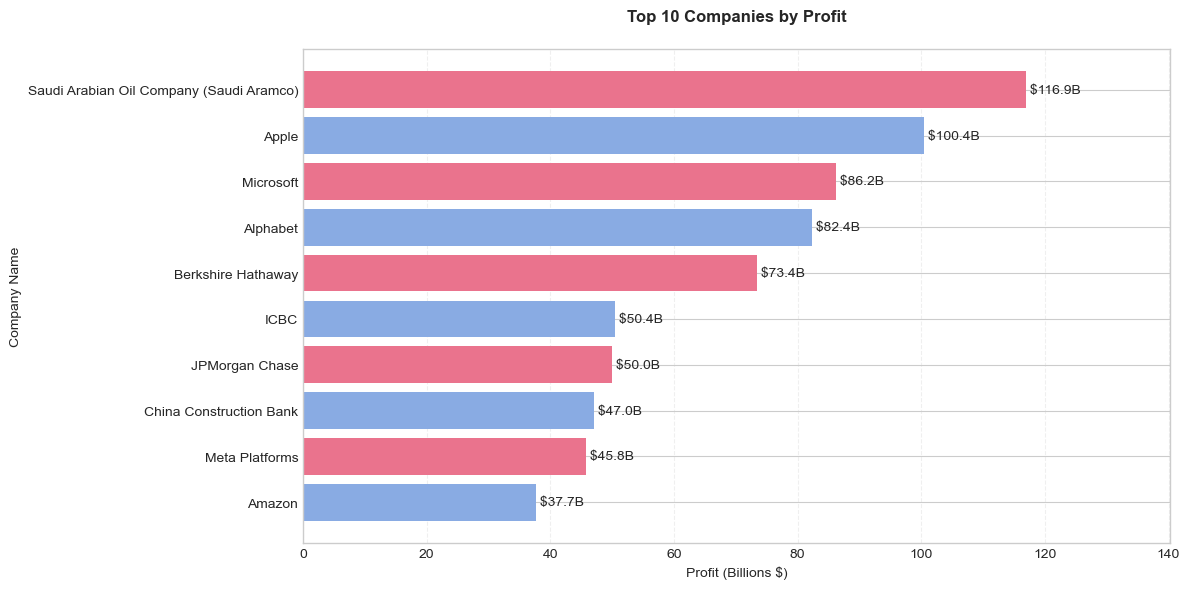

In [46]:
def plot_top_companies_profit():
    plt.figure(figsize=(12, 6))
    
    top_profit = df.nlargest(10, 'Profit').sort_values('Profit')
        
    bars = plt.barh(y=range(len(top_profit)), 
                   width=top_profit['Profit'],
                   color=colors)
    
    plt.yticks(range(len(top_profit)), top_profit['Name'])
    
    for i, v in enumerate(top_profit['Profit']):
        plt.text(v, i, f' ${v:.1f}B', va='center')
    
    plt.title('Top 10 Companies by Profit', pad=20, fontsize=12, fontweight='bold')
    plt.xlabel('Profit (Billions $)', fontsize=10)
    plt.ylabel('Company Name', fontsize=10)
    
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    
    plt.margins(x=0.2)
    
    plt.tight_layout()
    plt.show()

plot_top_companies_profit()

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier


# Define features (X) and target (y)
X = df[['Sales', 'Assets', 'Market Value', 'Employees', 'Industry', 'Country']]
y = df['Profit']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess features: encode categorical variables and normalize numeric variables
numeric_features = ['Sales', 'Assets', 'Market Value', 'Employees']
categorical_features = ['Industry', 'Country']

# Define data preprocessing pipeline with normalization
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Create Random Forest model and combine it with preprocessing steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Set up GridSearch for hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [15, 20, 25],
    'regressor__min_samples_split': [5, 10]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Best Model Parameters:", grid_search.best_params_)


Mean Squared Error: 10.236125749586655
R-squared: 0.3457745418139033
Best Model Parameters: {'regressor__max_depth': 15, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 300}


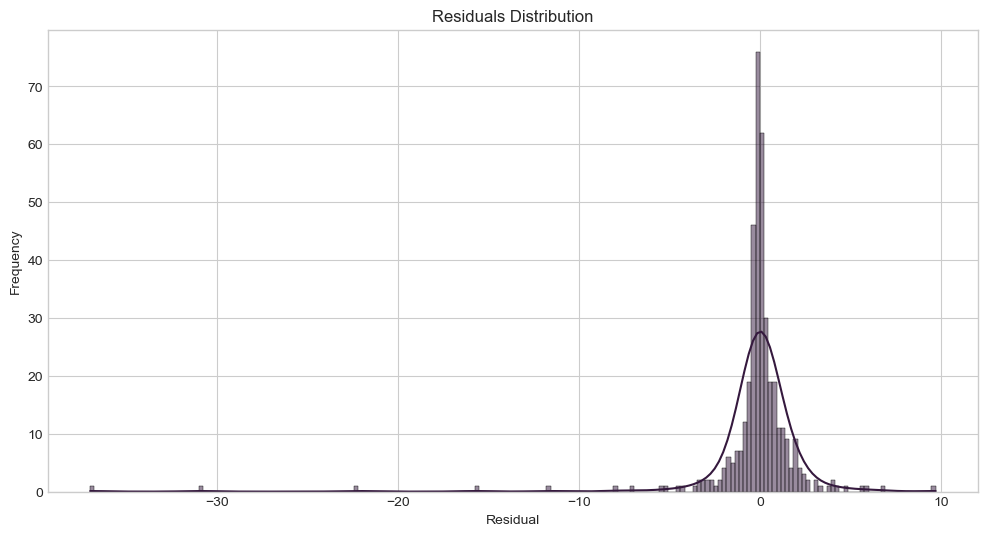

In [48]:
residuals = y_test - y_pred
plt.figure(figsize=(12,6) )
sns.histplot(residuals, kde=True )
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency' )
plt.show()

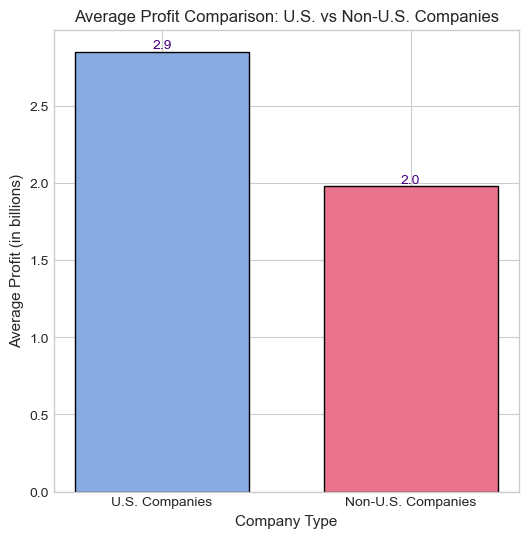

In [49]:
us_companies = df[df['Country'] == 'United States']
non_us_companies = df[df['Country'] != 'United States']

avg_profit_us = us_companies['Profit'].mean()
avg_profit_non_us = non_us_companies['Profit'].mean()

categories = ['U.S. Companies', 'Non-U.S. Companies']
average_profits = [avg_profit_us, avg_profit_non_us]

plt.figure(figsize=(6,6))
bars = plt.bar(categories, average_profits, color=colors, edgecolor='black', linewidth=1, width=0.7)
plt.title('Average Profit Comparison: U.S. vs Non-U.S. Companies', fontsize=12)
plt.xlabel('Company Type', fontsize=11)
plt.ylabel('Average Profit (in billions)', fontsize=11)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', color='#4B0082', fontsize=10)

plt.show()

In [176]:
count_us = us_companies['Profit'].count()
count_non_us = non_us_companies['Profit'].count()
count_us, count_non_us

(619, 1379)

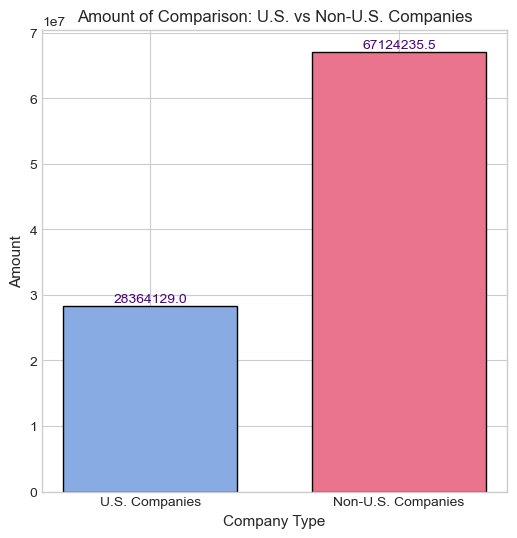

In [184]:
count_us_em = us_companies['Employees'].sum()
count_non_us_em= non_us_companies['Employees'].sum()

categories = ['U.S. Companies', 'Non-U.S. Companies']
em_sum = [count_us_em, count_non_us_em]
count_us_em, count_non_us_em
plt.figure(figsize=(6,6))
bars = plt.bar(categories, em_sum, color=colors, edgecolor='black', linewidth=1, width=0.7)
plt.title('Amount of Comparison: U.S. vs Non-U.S. Companies', fontsize=12)
plt.xlabel('Company Type', fontsize=11)
plt.ylabel('Amount', fontsize=11)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom', color='#4B0082', fontsize=10)

plt.show()

In [50]:
from scipy.stats import ttest_ind

df['Country'] = df['Country'].str.strip()  

# Separate US and non-US companies
us_data = df[df['Country'] == 'United States']
non_us_data = df[df['Country'] != 'United States']

# Check industry distribution between US and non-US companies
us_industry_counts = us_data['Industry'].value_counts(normalize=True)
non_us_industry_counts = non_us_data['Industry'].value_counts(normalize=True)
industry_difference = us_industry_counts.subtract(non_us_industry_counts, fill_value=0)

# Function to remove outliers in the "Profit" column
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)][column]

# Remove outliers from US and non-US profit data
us_profit_no_outliers = remove_outliers(us_data, 'Profit')
non_us_profit_no_outliers = remove_outliers(non_us_data, 'Profit')

# Calculate mean profit for each group after removing outliers
us_profit_mean_no_outliers = us_profit_no_outliers.mean()
non_us_profit_mean_no_outliers = non_us_profit_no_outliers.mean()

# Conduct independent t-test on data after removing outliers
t_stat_no_outliers, p_value_no_outliers = ttest_ind(us_profit_no_outliers, non_us_profit_no_outliers, equal_var=False)

print("Mean Profit for US companies (without outliers):", us_profit_mean_no_outliers)
print("Mean Profit for non-US companies (without outliers):", non_us_profit_mean_no_outliers)
print("Industry distribution difference between US and non-US companies:\n", industry_difference)
print("t-statistic (without outliers):", t_stat_no_outliers)
print("p-value (without outliers):", p_value_no_outliers)
print("Sample size for US companies:", len(us_profit_no_outliers))
print("Sample size for non-US companies:", len(non_us_profit_no_outliers))

Mean Profit for US companies (without outliers): 1.2888382189239334
Mean Profit for non-US companies (without outliers): 1.0608515548281505
Industry distribution difference between US and non-US companies:
 Industry
Aerospace & Defense             0.016091
Airlines                        0.000890
Auto Brands                    -0.000560
Auto Parts                      0.001616
Automotive                     -0.000725
                                  ...   
Trading Companies              -0.003525
Transportation                 -0.025115
Transportation and Logistics    0.002607
Travel & Leisure                0.012924
Utilities                       0.004891
Name: proportion, Length: 79, dtype: float64
t-statistic (without outliers): 3.741035153510918
p-value (without outliers): 0.00019500931186119895
Sample size for US companies: 539
Sample size for non-US companies: 1222


In [51]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

# Remove invalid columns and separate features and target
filtered_df = df.drop(columns=['Name'])

array = filtered_df.values

# array = df.values
# df['Rank_Class'] = (df['Rank'] > df['Rank'].mean()).astype(int)
#features = ['Sales', 'Assets', 'Market Value', 'Employees'] 
X = df[['Sales', 'Profit', 'Assets', 'Market Value']]
# y = df['Rank_Class'].values
# X = array[:, 1:11]  # Features
y = array[:, 1]    # Target

# Handle missing values in y
y = np.array(y)  # Ensure y is a numpy array
if np.any(pd.isna(y)):
    print("Missing values in target variable. Cleaning data...")
    valid_indices = ~pd.isna(y)  # Get indices where y is not NaN
    X = X[valid_indices]
    y = y[valid_indices]

# Convert categorical target values to numerical values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
X, y, array

(        Sales    Profit  Assets  Market Value
 0     252.900   50.0000  4090.7         588.1
 1     369.000   73.4000  1070.0         899.1
 2     489.100  116.9000   661.5        1919.3
 3     223.800   50.4000  6586.0         215.2
 4     183.300   25.0000  3273.8         307.3
 ...       ...       ...     ...           ...
 1996    0.201    0.6327     8.6          11.3
 1997    3.900    0.4602    33.2           6.0
 1998   15.200    0.1580     9.3           2.6
 1999    2.200    0.1348    25.9          10.0
 2000    5.100    0.8128    11.6           9.0
 
 [1998 rows x 4 columns],
 array([613, 623, 628, ..., 172,  42,  71]),
 array([[1, 252.9, 50.0, ..., 0.14376512577309508, 0.0013542096160127656,
         0.0002677361834742518],
        [2, 369.0, 73.4, ..., 0.8402803738317757, 0.0009306431273644389,
         0.00018511979823455235],
        [3, 489.1, 116.9, ..., 2.9014361300075584, 0.0069871428571428576,
         0.00167],
        ...,
        [1999, 15.2, 0.158, ..., 0.27956989

In [52]:
# Machine leaning models comparison

LR: 0.005637 (0.004388)
LDA: 0.006891 (0.004395)
KNN: 0.005004 (0.003751)
 DecisionTree: 0.002508 (0.004165)
Random forest: 0.001879 (0.002870)
NB: 0.002504 (0.003067)
SVM: 0.008133 (0.002859)


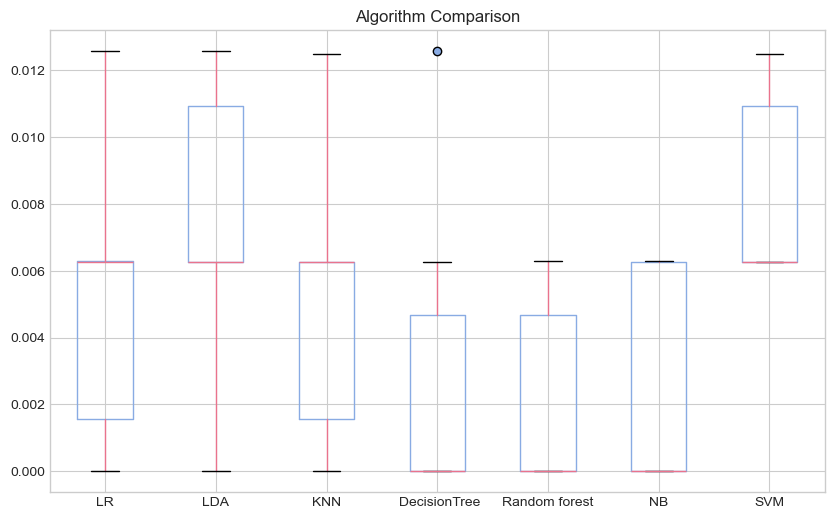

In [174]:

# Evaluate models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append((' DecisionTree', DecisionTreeClassifier()))
models.append(('Random forest', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare algorithms
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names, boxprops=dict(color='#89ABE3'),  whiskerprops=dict(color='#EA738D'), medianprops=dict(color='#EA738D'), flierprops=dict(markerfacecolor='#89ABE3', marker='o'))
plt.title('Algorithm Comparison')
plt.show()

In [54]:
#Machine learnig algoritm - Decision free Model

In [55]:
print(df.columns)

Index(['Rank', 'Name', 'Sales', 'Profit', 'Assets', 'Market Value', 'Industry',
       'Founded', 'Country', 'Employees', 'Profit_Margin', 'ROA',
       'Market_to_Assets', 'Sales_per_Employee', 'Profit_per_Employee'],
      dtype='object')


In [56]:
df['Rank_Class'] = (df['Rank'] > df['Rank'].mean()).astype(int)

In [57]:
features = ['Sales', 'Assets', 'Market Value', 'Employees'] 

In [58]:
X = df[features].fillna(0)
y = df['Rank_Class'].fillna(0)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [61]:
from sklearn.metrics import accuracy_score


In [62]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [63]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.84


In [64]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [65]:
predictions= clf.predict(X_test)
predictions 

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [66]:
clf.predict_proba(X_test)

array([[0.30989583, 0.69010417],
       [0.30989583, 0.69010417],
       [0.30989583, 0.69010417],
       [0.97113752, 0.02886248],
       [0.03714286, 0.96285714],
       [0.86206897, 0.13793103],
       [0.39393939, 0.60606061],
       [0.97113752, 0.02886248],
       [0.39393939, 0.60606061],
       [0.30989583, 0.69010417],
       [0.03714286, 0.96285714],
       [0.30989583, 0.69010417],
       [0.30989583, 0.69010417],
       [0.30989583, 0.69010417],
       [0.30989583, 0.69010417],
       [0.30989583, 0.69010417],
       [0.30989583, 0.69010417],
       [0.03714286, 0.96285714],
       [0.03714286, 0.96285714],
       [0.30989583, 0.69010417],
       [0.97113752, 0.02886248],
       [0.05882353, 0.94117647],
       [0.30989583, 0.69010417],
       [0.30989583, 0.69010417],
       [0.05882353, 0.94117647],
       [0.97113752, 0.02886248],
       [0.30989583, 0.69010417],
       [0.97113752, 0.02886248],
       [0.30989583, 0.69010417],
       [0.97113752, 0.02886248],
       [0.

In [67]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, predictions, labels=[0,1])

array([[148,  54],
       [ 10, 188]], dtype=int64)

In [68]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.7768595041322314

In [69]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.9494949494949495

In [70]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, predictions, target_names=['low rank', ' High Rank']))

              precision    recall  f1-score   support

    low rank       0.94      0.73      0.82       202
   High Rank       0.78      0.95      0.85       198

    accuracy                           0.84       400
   macro avg       0.86      0.84      0.84       400
weighted avg       0.86      0.84      0.84       400



In [71]:
feature_names= X.columns 
feature_names 

Index(['Sales', 'Assets', 'Market Value', 'Employees'], dtype='object')

In [72]:
clf.feature_importances_

array([0.4700425 , 0.15057328, 0.37938422, 0.        ])

In [73]:
feature_importance = pd.DataFrame(clf.feature_importances_, index= feature_names).sort_values(by=0, ascending=False)
feature_importance

,0
Sales,0.470043
Market Value,0.379384
Assets,0.150573
Employees,0.000000


In [74]:
features= list(feature_importance[feature_importance[0]>0].index)


<Axes: >

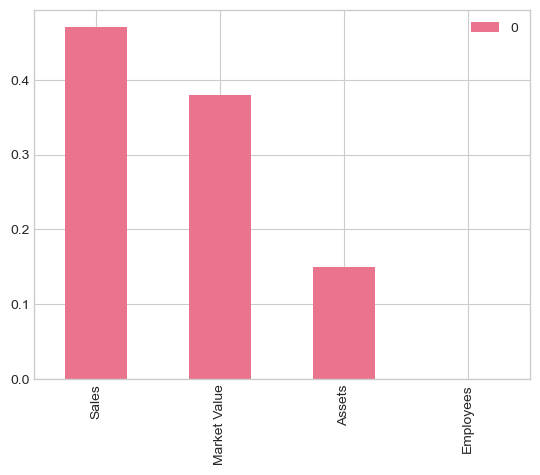

In [75]:
feature_importance.head(10).plot(kind='bar', color = '#EA738D')

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


[Text(0.5, 0.875, 'Sales <= 12.55\ngini = 0.5\nsamples = 1598\nvalue = [798, 800]\nclass = High Rank'),
 Text(0.25, 0.625, 'Assets <= 48.6\ngini = 0.349\nsamples = 794\nvalue = [179, 615]\nclass = High Rank'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Market Value <= 21.15\ngini = 0.295\nsamples = 734\nvalue = [132, 602]\nclass = High Rank'),
 Text(0.0625, 0.125, 'gini = 0.072\nsamples = 350\nvalue = [13, 337]\nclass = High Rank'),
 Text(0.1875, 0.125, 'gini = 0.428\nsamples = 384\nvalue = [119, 265]\nclass = High Rank'),
 Text(0.375, 0.375, 'Sales <= 5.55\ngini = 0.339\nsamples = 60\nvalue = [47, 13]\nclass = Low Rank'),
 Text(0.3125, 0.125, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]\nclass = High Rank'),
 Text(0.4375, 0.125, 'gini = 0.117\nsamples = 48\nvalue = [45, 3]\nclass = Low Rank'),
 Text(0.75, 0.625, 'Assets <= 9.35\ngini = 0.354\nsamples = 804\nvalue = [619, 185]\nclass = Low Rank'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Market Value <= 53.0\ngini = 

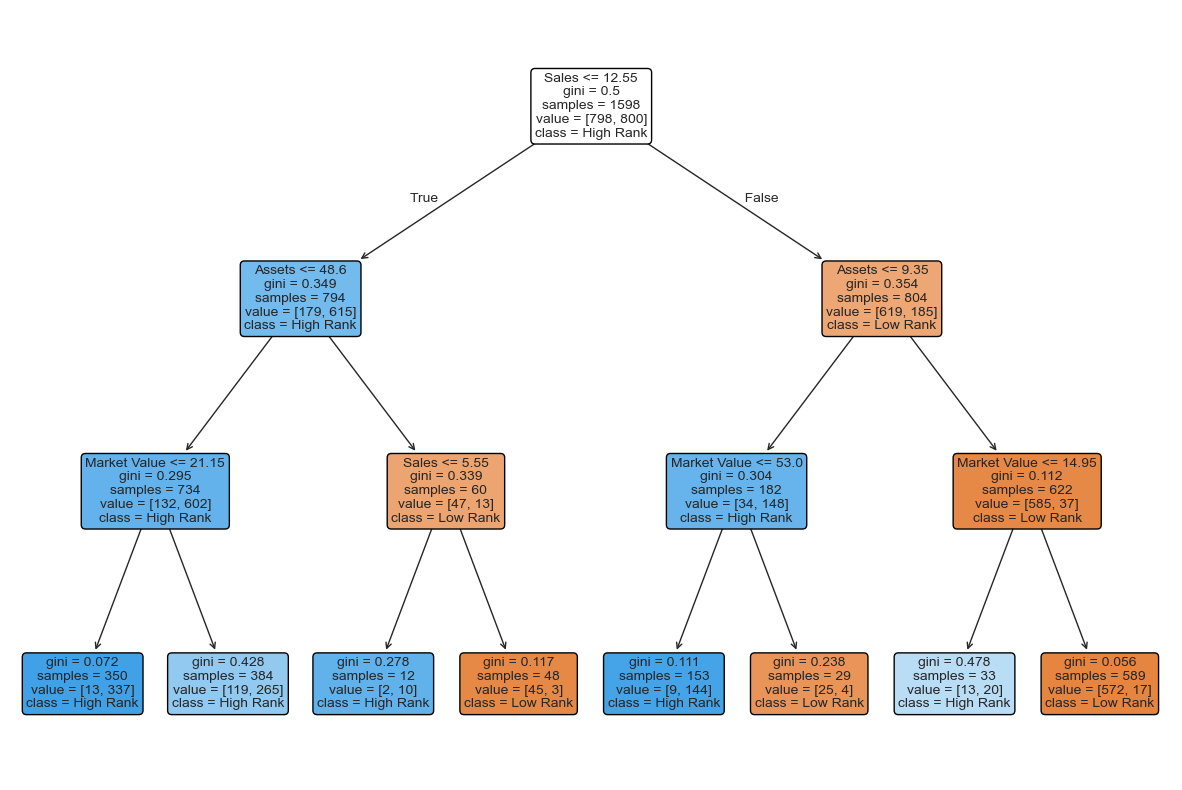

In [77]:
plt.figure(figsize=(15, 10))
plot_tree(clf, 
          feature_names=features, 
          class_names=['Low Rank', 'High Rank'],  
          filled=True, 
          rounded=True, 
          fontsize=10)

In [78]:
#Machine learnig algoritm - Logistic Regretion Model

In [79]:
# Define X (independent variables) and y (dependent variable)
X1 = df.drop('Industry', axis=1)  # Drop the target column
X3 = X1.drop('Name', axis=1)
X4 = X3.drop('Country', axis=1)
X5 = X4.drop('Founded', axis=1)
X = X5.drop('Employees', axis=1)
  
y = df['Rank']  # Define the target column as y
    
# Verify the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
    
# Verify the data types of X
print("Data types in X:\n", X.dtypes)
    
# Preview the first rows of X and y
print("\nFirst rows of X:\n", X.head())
print("\nFirst rows of y:\n", y.head())
print(X.isna())

Shape of X: (1998, 11)
Shape of y: (1998,)
Data types in X:
 Rank                     int64
Sales                  float64
Profit                 float64
Assets                 float64
Market Value           float64
Profit_Margin          float64
ROA                    float64
Market_to_Assets       float64
Sales_per_Employee     float64
Profit_per_Employee    float64
Rank_Class               int32
dtype: object

First rows of X:
    Rank  Sales  Profit  Assets  Market Value  Profit_Margin        ROA  \
0     1  252.9    50.0  4090.7         588.1      19.770660   1.222285   
1     2  369.0    73.4  1070.0         899.1      19.891599   6.859813   
2     3  489.1   116.9   661.5        1919.3      23.901043  17.671958   
3     4  223.8    50.4  6586.0         215.2      22.520107   0.765260   
4     5  183.3    25.0  3273.8         307.3      13.638843   0.763639   

   Market_to_Assets  Sales_per_Employee  Profit_per_Employee  Rank_Class  
0          0.143765            0.001354      

In [80]:
from sklearn.model_selection import train_test_split
import numpy as np
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print("Training set shape (X_train):", X_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Test target shape (y_test):", y_test.shape)

Training set shape (X_train): (1598, 11)
Test set shape (X_test): (400, 11)
Training target shape (y_train): (1598,)
Test target shape (y_test): (400,)


In [81]:
print("Number of NaN values in each column:\n", X_train.isna().sum())

Number of NaN values in each column:
 Rank                   0
Sales                  0
Profit                 0
Assets                 0
Market Value           0
Profit_Margin          0
ROA                    0
Market_to_Assets       0
Sales_per_Employee     0
Profit_per_Employee    0
Rank_Class             0
dtype: int64


In [82]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')

# Train the model on the training data
model.fit(X_train, y_train)

# Verify the training completion
print("Model training completed!")

Model training completed!


In [83]:
yPred= model.predict(X_test)
test_results1 = pd.DataFrame(X_test,columns=df[['Sales', 'Profit', 'Assets', 'Market Value']].columns, )
test_results1['Actual Rank'] = y_test.values
test_results1['Predicted Rank'] = yPred

#Sorting companies by predicted rank

test_results1 = test_results1.sort_values(by='Predicted Rank')

print(test_results1.head(20))

     Sales  Profit  Assets  Market Value  Actual Rank  Predicted Rank
45    71.5    27.3   180.9         672.0           46              38
23   142.7    45.8   222.8        1197.0           24              38
29   142.7    18.7   281.0         204.1           30              40
32   134.0    11.3   380.2         168.6           33              41
44    89.7    17.5   172.0         372.2           45              48
49   103.5    12.5   150.4         272.1           50              48
30   148.2     9.7  1056.8         113.8           31              51
56    80.3    11.3  2259.7          58.1           57              56
78    65.3    12.8   107.5         208.4           79              59
70   174.9    10.7   276.6          52.2           71              61
69    98.0     4.9   561.4          73.6           70              62
353  143.3    18.0  4323.8           1.8          354              73
67    84.4     8.0   156.3         148.2           68              85
65    75.2     9.0  

In [84]:
#Machine learnig algoritm - Random Forest

In [85]:
# Modelling

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df[['Sales', 'Profit', 'Assets', 'Market Value']]
y = df['Rank']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

yPred = model.predict(X_test)
#EVALUATING THE MODEL
y_test.info()
ms_error = mean_squared_error(y_test, yPred)
r2 = r2_score(y_test, yPred)
print(f'Mean Squared Error: {ms_error:.2f}')
print(f'R2 Score: {r2:.2f}')
print(yPred)

<class 'pandas.core.series.Series'>
Index: 400 entries, 256 to 966
Series name: Rank
Non-Null Count  Dtype
--------------  -----
400 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB
Mean Squared Error: 3493.16
R2 Score: 0.99
[ 273.32  376.03  296.24  538.06 1386.29 1264.67  536.84 1880.18   63.76
 1602.43   55.32 1809.84 1085.35  567.48 1275.75  287.91  691.14  134.69
 1437.63 1492.17 1675.93  978.57  510.47 1809.52  643.05  109.97  417.61
  894.97  323.84   25.36  580.09 1669.3   602.17  901.19 1409.99 1306.43
  811.6  1259.88  975.65 1579.95  126.73 1605.81  535.48  985.28 1414.18
  304.21 1544.89  948.08   64.49  536.93 1593.94 1517.21  917.16  221.87
  509.8   933.6   656.01  229.51 1138.06  658.04 1873.81 1653.48  513.12
  255.66 1342.38 1711.99 1539.99 1626.08  103.46 1279.75  342.14 1620.62
 1436.13 1047.37  767.14 1232.3  1499.19 1157.58  358.38  872.35   96.36
 1873.8  1910.08 1731.15 1163.   1472.21  491.86 1066.45  855.2   620.22
  711.1   501.68 1352.2   758.53 1397.

In [86]:
test_results2 = pd.DataFrame(X_test,columns=df[['Sales', 'Profit', 'Assets', 'Market Value']].columns)
test_results2['Actual Rank'] = y_test.values
test_results2['Predicted Rank'] = yPred

#Sorting companies by predicted rank

test_results2 = test_results2.sort_values(by='Predicted Rank')

print(test_results2.head(20))

        Sales    Profit    Assets  Market Value  Actual Rank  Predicted Rank
29   2.507097  2.659791  0.416343      1.069990           30           25.36
261  2.320402  1.463244  0.671692      0.832366           33           29.34
207  2.507097  7.041740  0.266532      7.716113           24           36.42
308  2.625123  1.204531  2.413315      0.465554           31           36.47
295  0.979204  4.050372  0.158678      4.201948           46           50.75
319  1.369761  2.465756  0.135769      2.195192           45           52.71
10   1.168044  1.463244  5.509676      0.092718           57           55.32
284  3.841858  2.886165  0.267819      0.138904           60           55.39
192  1.665897  1.657278  0.080168      1.525158           50           59.89
8    1.058603  1.091344  1.921665      0.128863           66           63.76
48   3.198083  1.366227  0.405017      0.053225           71           64.49
209  7.198074  0.816462  0.335775      0.188437           64           71.36

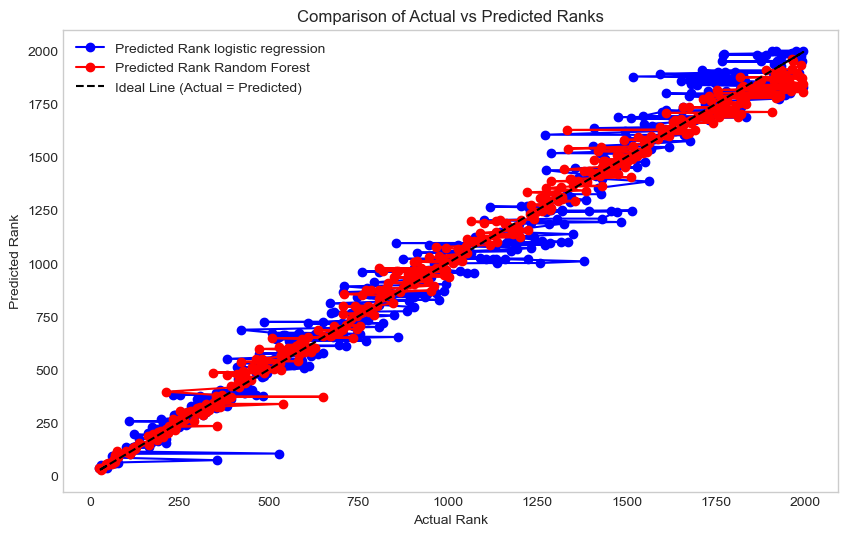

In [170]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(test_results1["Actual Rank"], test_results1["Predicted Rank"], 'bo-', label="Predicted Rank logistic regression")
plt.plot(test_results2["Actual Rank"], test_results2["Predicted Rank"], 'ro-', label="Predicted Rank Random Forest")
plt.plot(test_results1["Actual Rank"], test_results1["Actual Rank"], 'k--', label="Ideal Line (Actual = Predicted)")
# plt.plot(test_results2["Actual Rank"], test_results2["Actual Rank"], 'k--', label="Ideal Line (Actual = Predicted)")

plt.xlabel("Actual Rank")
plt.ylabel("Predicted Rank")
plt.title("Comparison of Actual vs Predicted Ranks")
plt.legend()
plt.grid()

plt.show()